## Dice Score Coefficient

### Algorithms:
- algorithm for easy picture plotting (has to be updated to remove white borders if we want to, should NOT influece the dice coefficient, just for better visualization :))-> cell 3
- picture loading -> cell 5
- assignment of loaded  pictures to gt and tresholded lists -> cell 6
- dice score algorithm, where: f_dice(x) returns and prints the dice score if foreground is taken as positive pixels, b_dice(x) -"- background as positive pixels, x: index in list -> cell 7

### Trial grounds
- Picture plotting trial -> cell 4
- Dice score trials -> cells 8 & 9

### Other cells
- cells 10 and up are brainstorming, flawed code, code that is yet to be implemented such as dice score average, for which we need a whole imageJ dataset to try it on

In [2]:
%pylab
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: <object object at 0x000001DC71FCB040>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [20]:
#Function for optimised images for dice score, removes axis labels, for some reason does not remove the white border :/

def better_imshow(x,y): # for x insert the image path, for y the name you want your picture to have
    y = plt.imread(x)
    plt.imshow(gt1,'gray')
    plt.axis('off')
    plt.axis('tight')
   

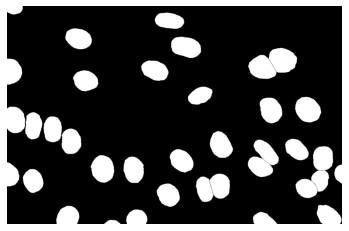

In [21]:
#BETTER IMSHOW TRIAL
x = r'data\Otsu_data\NIH3T3\gt\0.png'
y = gt1
better_imshow(x,y)

In [ ]:
#normal picture loading

gt1 = plt.imread(r"data\Otsu_data\NIH3T3\gt\0.png")

pt1 = plt.imread(r"data\Otsu_data\NIH3T3\imageJ\dna-0.png")

In [ ]:
tresholded = [pt1]
ground_truth = [gt1]

In [22]:
#TRIAL VERSION, BACKGROUND DICE WORKS, FOREGROUND DICE IM NOT 100% SURE (about accuracy, because I used the "not" operator)





def b_dice(x): # POSITIVE PIXELS = BACKGROUNDx=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #somehow define that we are taking gt picture x
    pt = tresholded[x] #somehow define that we are taking post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]==0:
            if pt[x,y]==0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]==0:
                fp+=1
            else:
                tn+=1 #this part not rly needed tbh
    b_dsc= 2*tp/(2*tp+fn+fp)
    return b_dsc
    print(b_dsc)

def f_dice(x): # POSITIVE PIXELS = FOREGROUND x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #somehow define that we are taking gt picture x
    pt = tresholded[x] #somehow define that we are taking post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]!=0:
            if pt[x,y]!=0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]!=0:
                fp+=1
            else:
                tn+=1 #this part not rly needed tbh
    f_dsc= 2*tp/(2*tp+fn+fp)
    return f_dsc
    print(f_dsc)
    
f_dice(0)
b_dice(0)


0.9827235249209292

In [4]:
b_dice(0)

0.9827235249209292

In [5]:
f_dice(0)

0.9139577023521386

In [11]:
# lists of tresholded pictures and gt pictures!
# could we automatize this assigning process????
tresholded = [pic1, pic2, pic3, ...]
ground_truth = [pic1, pic2, pic3, ...]

NameError: name 'pic1' is not defined

In [12]:
def dice(x): #x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #somehow define that we are taking gt picture x
    pt = tresholded[x] #somehow define that we are taking post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    for i in shape(gt): # shape(gt) should be equalt to shape(pt)
        if gt[i]==256:
            if pt[i]==256:
                tp+=1
            else:
                fn+=1
        else:
            if pt[i]==256:
                fp+=1
            else:
                tn+=1 #this part not rly needed tbh
    dsc= 2*tp/(2*tp+fn+fp)
    return dsc



    

In [13]:
# we can then make it run trough a whole dataset like
def dice_avg(y):
    sum = 0
    for x in range(0,len(tresholded)+1):
        dice(x)
        sum += dsc
    dsc_avg = sum/len(tresholded)
    return dsc_avg

    
    #whatever we want to do, we can store them in a vector and then make a graph or smth to visualize them especially for the report as time goes on, or calculate the average :)